In [31]:
import os, sys, time
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score


import common
import DimensionalityReduction.DimensionalityReductionDatasets as dr_datasets
from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET = "Faces"

In [21]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

reload(dr_datasets)
_, pca_faces = dr_datasets.get_faces_pca()
ica_faces = dr_datasets.get_faces_ica()
random_faces = dr_datasets.get_faces_random_projection()
boosted_faces = dr_datasets.get_faces_boosted_best_features()

/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Running PCA for 62 components
Running ICA for 188 components


In [14]:
pca_faces.shape[1]

62

In [15]:
reload(common)
n = pca_faces.shape[1]
distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times =\
common.compute_kmeans_scores(pca_faces, n)

For n_clusters = 2 average silhouette_score: 0.07012950695600918 time taken: 0.1349341869354248s
For n_clusters = 3 average silhouette_score: 0.05586456116087116 time taken: 0.10695886611938477s
For n_clusters = 4 average silhouette_score: 0.046091463699971524 time taken: 0.13631606101989746s
For n_clusters = 5 average silhouette_score: 0.037077905847957664 time taken: 0.2296431064605713s
For n_clusters = 6 average silhouette_score: 0.02980184115685446 time taken: 0.8230690956115723s
For n_clusters = 7 average silhouette_score: 0.028412654777352227 time taken: 0.23637175559997559s
For n_clusters = 8 average silhouette_score: 0.029750288819131596 time taken: 0.5407814979553223s
For n_clusters = 9 average silhouette_score: 0.022225027546952686 time taken: 0.20091557502746582s
For n_clusters = 10 average silhouette_score: 0.01987497499985316 time taken: 0.2905409336090088s
For n_clusters = 11 average silhouette_score: 0.022696258682957385 time taken: 0.24689579010009766s
For n_clusters = 

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


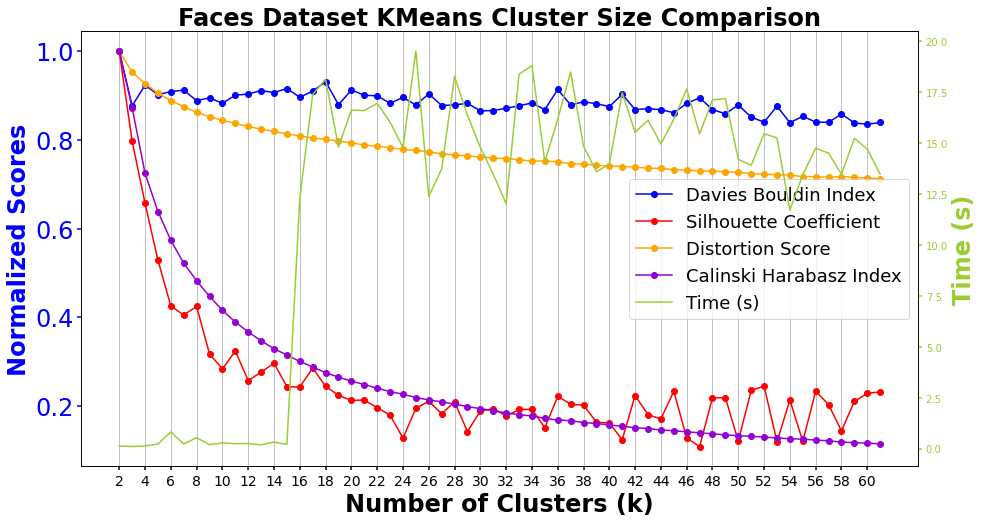

In [16]:
common.plot_kmeans_all(distortions, davies_bouldin_scores, silhouette_scores, calinski_harabasz_scores, times, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:109: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


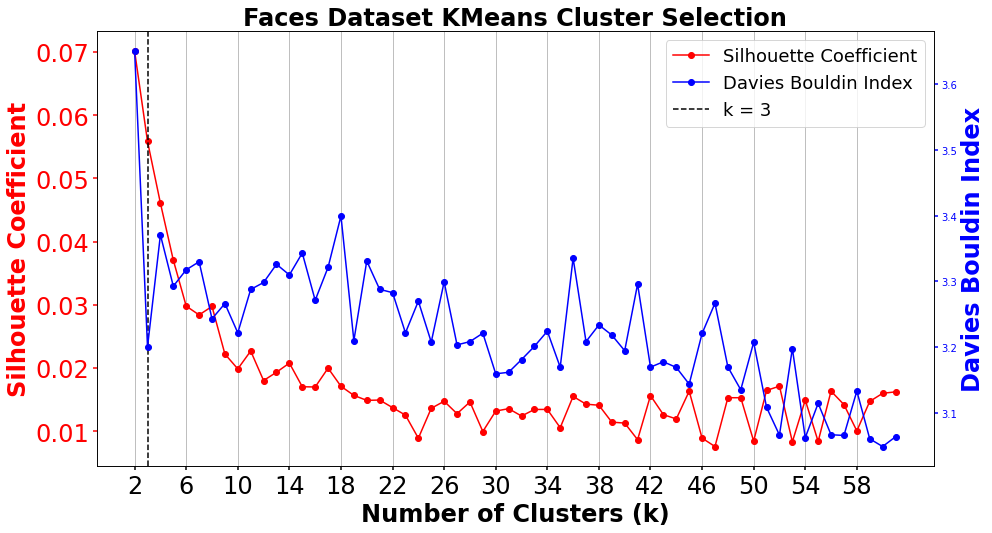

In [17]:
reload(common)
best_k = 3
common.plot_kmeans_selection(davies_bouldin_scores, silhouette_scores, best_k=best_k, DATASET=DATASET)

For n_clusters = 3 average silhouette_score: 0.056454858788520426 time taken: 0.18146181106567383s


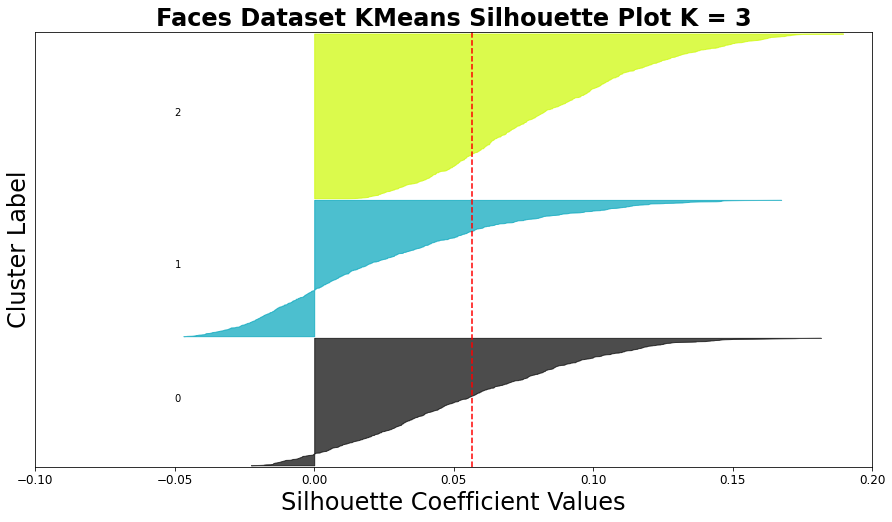

In [23]:
reload(common)
common.plot_silhouette_kmeans(pca_faces, best_k, DATASET, xlim=[-0.1, 0.2])

In [32]:
start_time = time.time()
km = KMeans(n_clusters=best_k, **common.km_arguements)
km.fit(pca_faces)
end_time = time.time()
print("Time Taken {} s".format(end_time - start_time))
y_train_faces['km_labels']=km.labels_
pca_faces_km = pd.DataFrame(pca_faces.copy())
pca_faces_km['km_labels'] = km.labels_

print("homogeneity_score sex: ", homogeneity_score(km.labels_, y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(km.labels_, y_train_faces['race']))

Time Taken 0.21152758598327637 s
homogeneity_score sex:  0.0006892597411593974
homogeneity_score race:  0.00041037647426078066


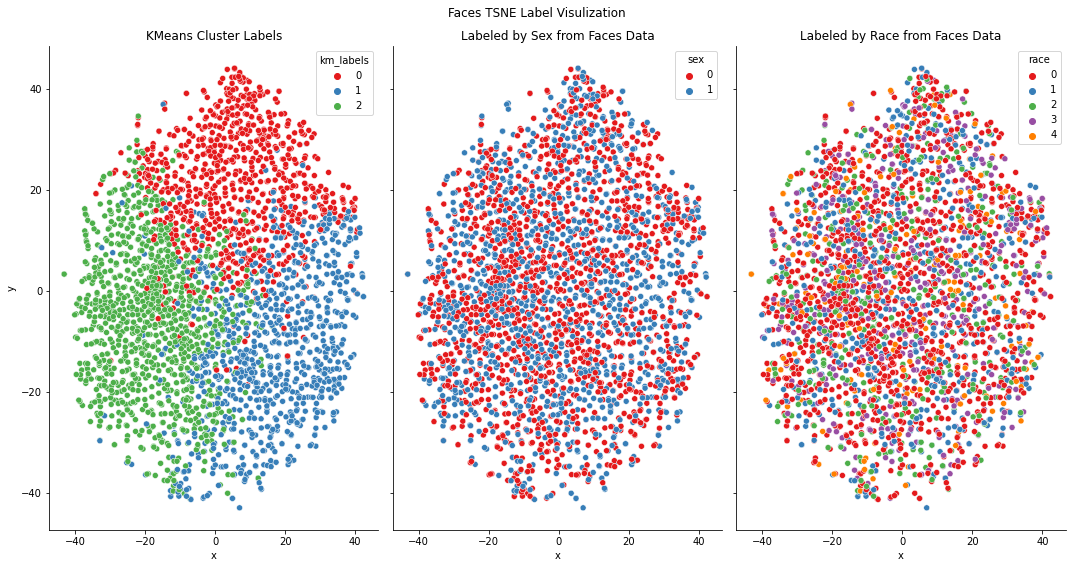

In [33]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(pca_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="km_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("KMeans Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

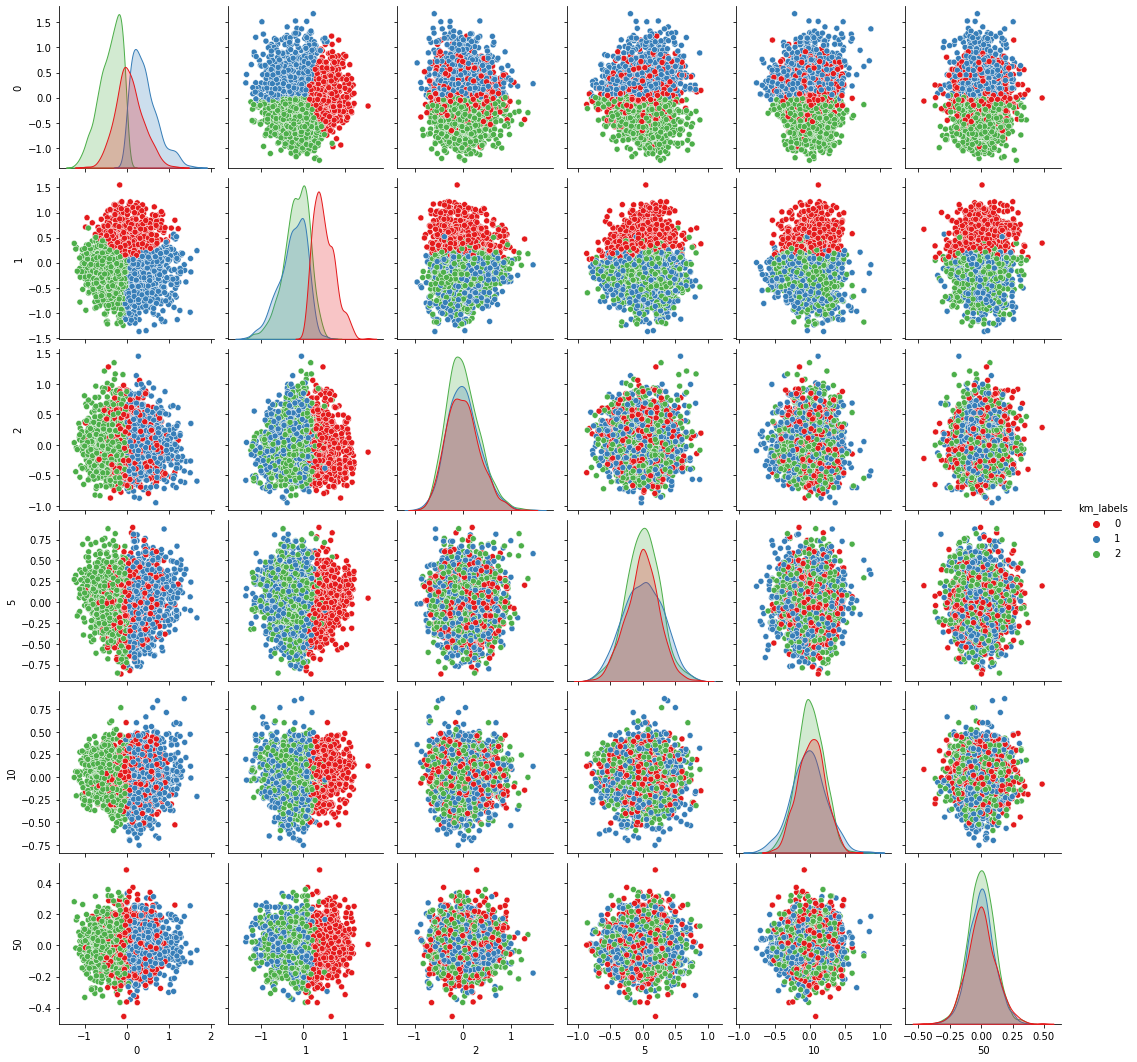

In [37]:
sns.pairplot(pca_faces_km[[0, 1, 2, 5, 10, 50, "km_labels"]], hue="km_labels", palette="Set1")

# Expectation Maximization

In [38]:
reload(common)
em_n = pca_faces.shape[1]
n_components = np.arange(2, em_n)
davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em =\
common.compute_em_scores(pca_faces, em_n)

For n_clusters = 2 average silhouette_score: 0.057623360078981056 time taken: 0.5549004077911377s
For n_clusters = 3 average silhouette_score: 0.04534107353346669 time taken: 0.7499456405639648s
For n_clusters = 4 average silhouette_score: 0.0242508892599782 time taken: 1.2451069355010986s
For n_clusters = 5 average silhouette_score: 0.029584664154017417 time taken: 1.041734218597412s
For n_clusters = 6 average silhouette_score: 0.007239616492337595 time taken: 1.2653639316558838s
For n_clusters = 7 average silhouette_score: 0.005106417174008283 time taken: 1.6790945529937744s
For n_clusters = 8 average silhouette_score: 0.013045554124318274 time taken: 1.4579846858978271s
For n_clusters = 9 average silhouette_score: 0.01920806768862274 time taken: 1.705357551574707s
For n_clusters = 10 average silhouette_score: 0.015642931392611453 time taken: 1.948774814605713s
For n_clusters = 11 average silhouette_score: 0.013438672075086365 time taken: 1.1505811214447021s
For n_clusters = 12 avera

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:250: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


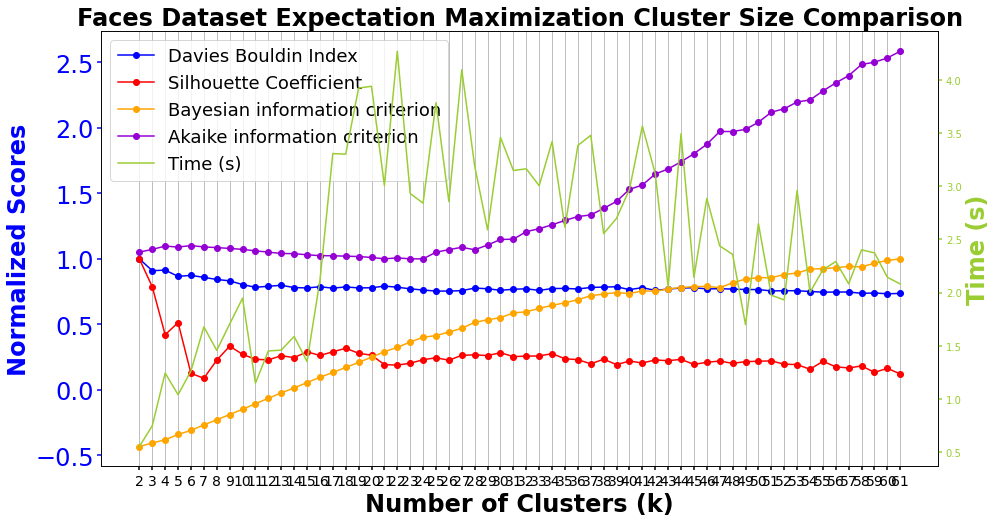

In [39]:
reload(common)
common.plot_em_all(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, times_em, DATASET)

/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:301: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  host = fig.add_subplot(111)


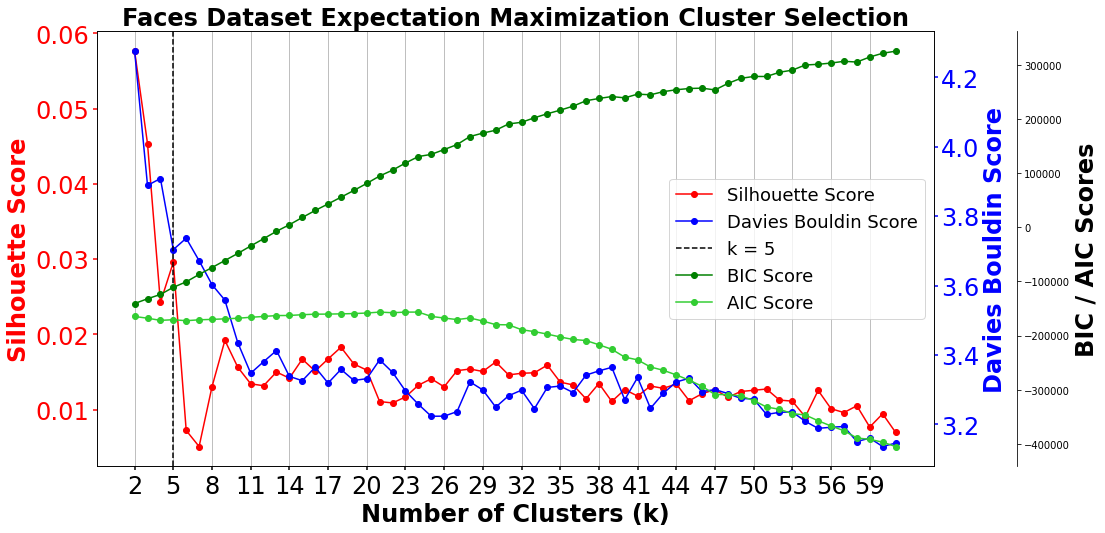

In [76]:
reload(common)
best_k = 5
common.plot_em_selection(davies_bouldin_scores_em, silhouette_scores_em, bic_scores_em, aic_scores_em, best_k, DATASET, tick_spacing=3)

For n_clusters = 9 average silhouette_score: 0.01920806768862274 time taken: 4.858631610870361s


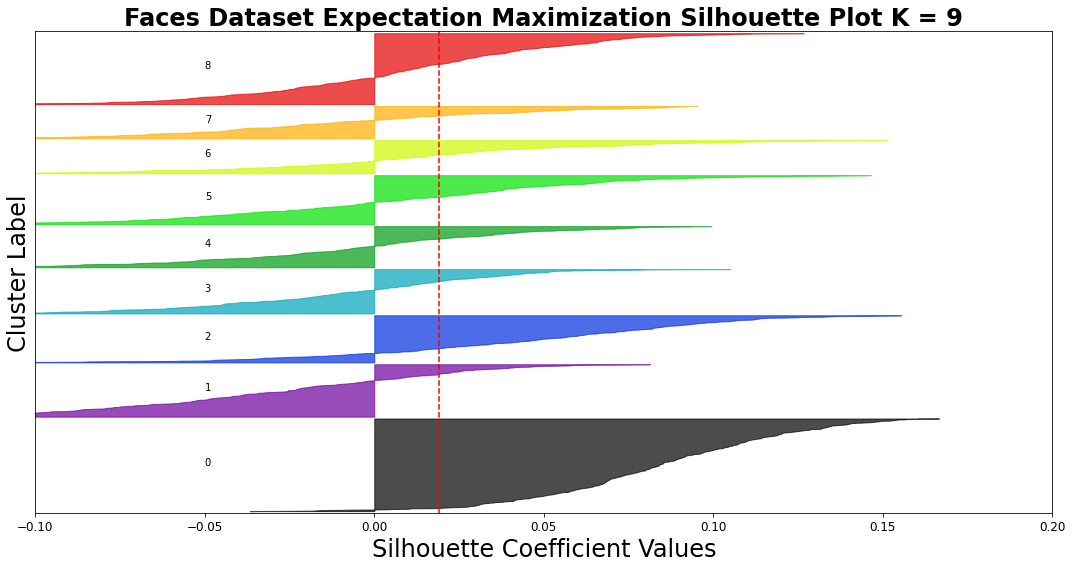

In [82]:
reload(common)
best_k=9
common.plot_silhouette_em(pca_faces, best_k, DATASET, xlim=[-0.4, 0.2])

In [78]:
start_time = time.time()
em_model = GaussianMixture(best_k, covariance_type='full', random_state=42)
em_model.fit(pca_faces)
end_time = time.time()
print("time taken {} s".format(end_time-start_time))
y_train_faces['em_labels']=em_model.predict(pca_faces)
pca_faces_gm = pd.DataFrame(pca_faces.copy())
pca_faces_gm['em_labels'] = em_model.predict(pca_faces)

print("homogeneity_score sex: ", homogeneity_score(em_model.predict(pca_faces), y_train_faces['sex']))
print("homogeneity_score race: ", homogeneity_score(em_model.predict(pca_faces), y_train_faces['race']))

time taken 1.6215596199035645 s
homogeneity_score sex:  0.0007853898153957103
homogeneity_score race:  0.0025988789506097127


In [83]:
# Create a t-SNE model with learning rate 50
m = TSNE(perplexity=30, learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(pca_faces)
y_train_faces['x'] = tsne_features[:,0]
y_train_faces['y'] = tsne_features[:,1]

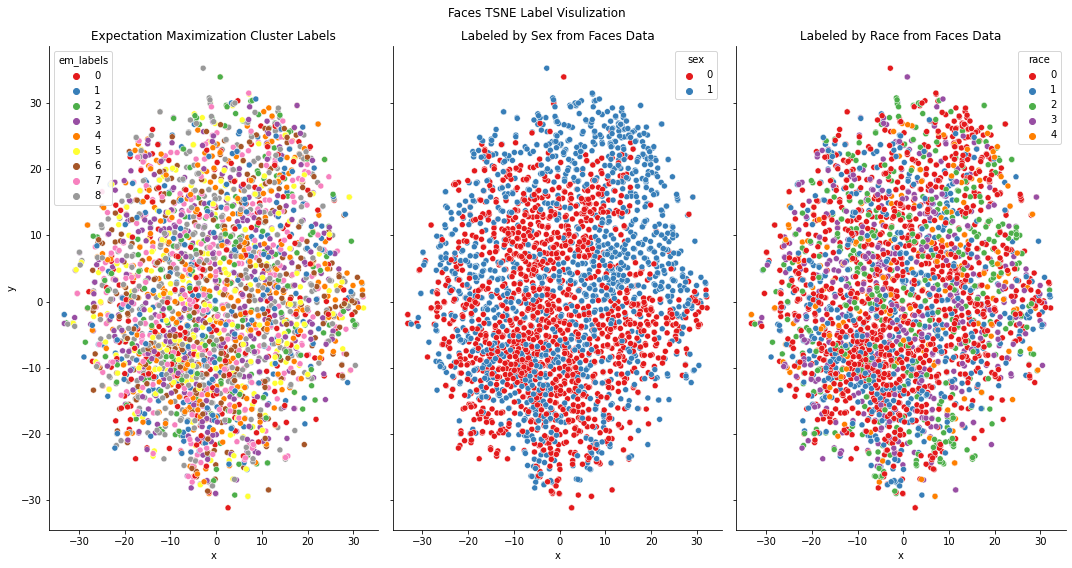

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=True, figsize=default_figure_size, sharey=True)

sns.scatterplot(x="x", y="y", hue="em_labels", data=y_train_faces, palette="Set1", ax=ax1)
sns.scatterplot(x="x", y="y", hue="sex", data=y_train_faces, palette="Set1", ax=ax2)
sns.scatterplot(x="x", y="y", hue="race", data=y_train_faces, palette="Set1", ax=ax3)

fig.suptitle("{} TSNE Label Visulization".format(DATASET))
ax1.set_title("Expectation Maximization Cluster Labels")
ax2.set_title("Labeled by Sex from Faces Data")
ax3.set_title("Labeled by Race from Faces Data")
sns.despine(fig)
plt.tight_layout()

plt.show()

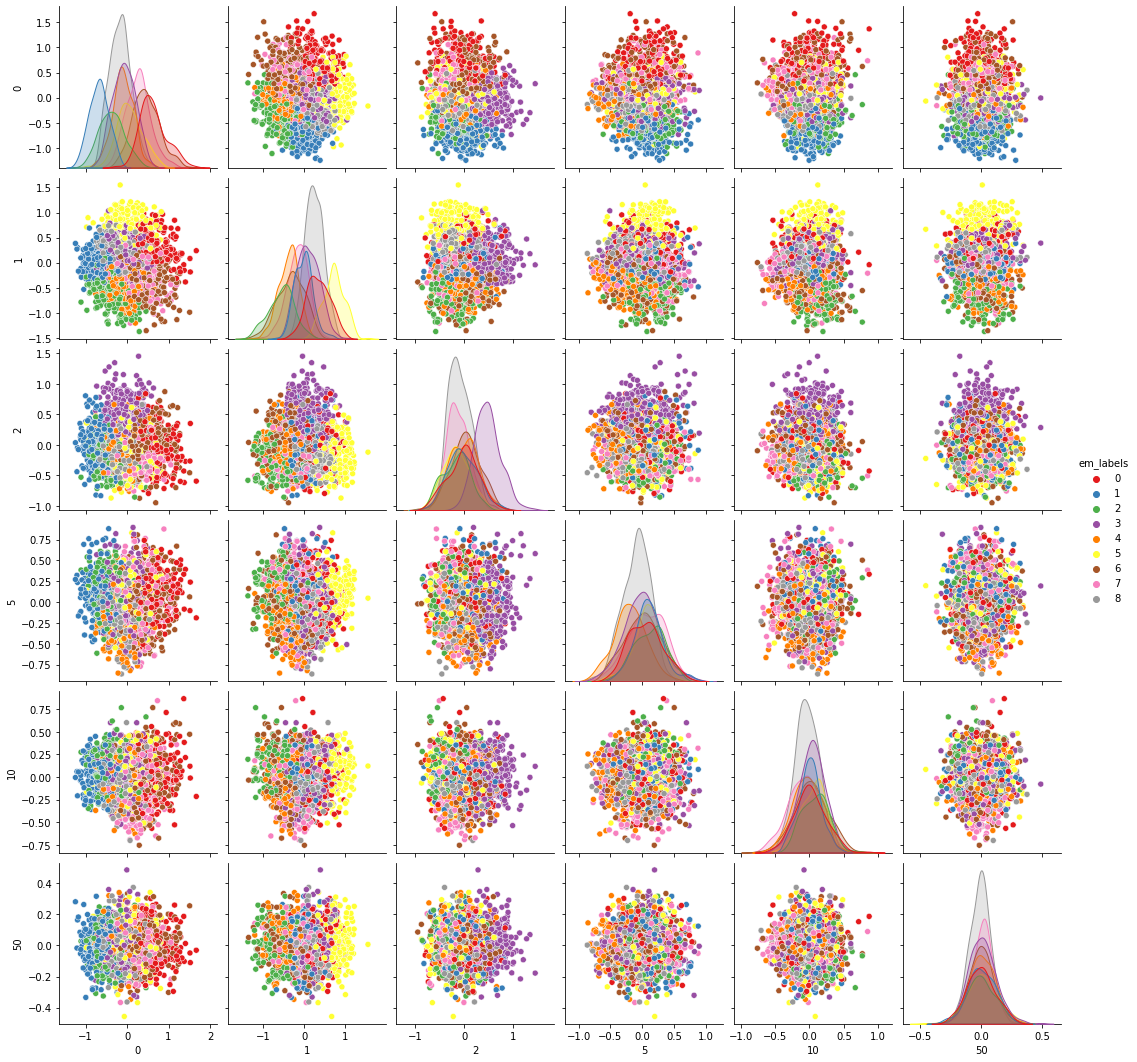

In [81]:
sns.pairplot(pca_faces_gm[[0, 1, 2, 5, 10, 50, "em_labels"]], hue="em_labels", palette="Set1")